In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras import Input
from tensorflow.keras.layers import concatenate, Permute, Reshape
import os
import math
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM,TimeDistributed
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy as np
import sklearn.metrics as metrics

In [2]:
import pandas as pd
import math
import numpy as np
from numpy.lib.function_base import average
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras import models, layers
import tensorflow as tf

In [4]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import os
import sys
import warnings
# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import json
import os
import math
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

import pandas as pd
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pickle
import joblib
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import tensorflow as tf

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
/content/drive/MyDrive/MySelfVersionProjects/audio_sample/Sample_set_6_auto_labeling_validation/labels_part2_completed_sample_set6.xlsx

In [ ]:
#labels is the output of the expert_validation_part1
labels = pd.read_excel("/content/drive/MyDrive/MySelfVersionProjects/audio_sample/Sample_set_6_auto_labeling_validation/labels_part2_completed_sample_set6.xlsx", sheet_name="true_positive_rate")

In [ ]:
labels

,Unnamed: 0,Breath (CM),pitch_anomaly,Pitch (CM),audio_quality_anomaly,SoundQuality (CM),Unnamed: 6
0,0.001969,0,0.095105,1,0.830746,1.0,NaN
1,0.329447,0,0.398916,0,0.6016,1.0,NaN
2,0.136229,0,0.14149,0,0.539486,0.0,NaN
3,0.79866,1,0.069902,0,0.763912,1.0,NaN
4,0.000425,0,0.818002,0,0.764363,1.0,NaN
...,...,...,...,...,...,...,...
109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,NaN,True Positive Rate,False Positive Rate,NaN,NaN,NaN,NaN
111,Breath,0.75,0.1,NaN,NaN,NaN,NaN
112,Abnormal Pitch,0.55,NaN,NaN,NaN,NaN,NaN


In [ ]:
#for audio quality
y_true_audioquality = labels["SoundQuality (CM)"]
y_pred_train_a = labels["audio_quality_anomaly"]


In [ ]:
#for breath
y_true_breath = labels["Breath (CM)"]
y_pred_train_b = labels["breath"]


#for pitch
y_true_pitch = labels["Pitch (CM)"]
y_pred_train_pi = labels["pitch_anomaly"]


#for audio quality
y_true_audioquality = labels["SoundQuality (CM)"]
y_pred_train_a = labels["audio_quality_anomaly"]




# accuracy
How did we choose the best threshold for each predicted EDLF? for breath, it is 2STDEV of the whole predicted breath labels (since they are so imbalanced). For the pitch and audio quality anomalies, 1STDEV are chosen as bellow:

In [ ]:
#for breath 2STDEV as the threshold
y_pred_train_b = list(map(lambda x: 1 if x>0.622 else 0, y_pred_train_b))

In [ ]:
#for pitch 1STDEV as the threshold
y_pred_train_pi = list(map(lambda x: 1 if x>0.68 else 0, y_pred_train_pi))

In [ ]:
#for audio quality 1STDEV as the threshold
y_pred_train_a = list(map(lambda x: 1 if x>0.84 else 0, y_pred_train_a))

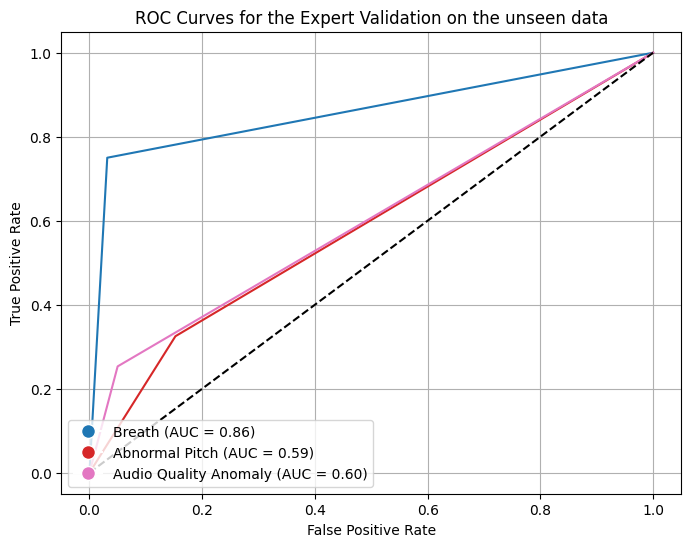

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc



# Initialize lists to store FPR and TPR for each problem
fpr_list = []
tpr_list = []
roc_auc_list = []
problem_names = ["Breath", "Abnormal Pitch", "Audio Quality Anomaly"]
# Compute ROC curve for each problem
for y_true, y_pred in zip([y_true_breath, y_true_pitch, y_true_audioquality], [y_pred_train_b, y_pred_train_pi, y_pred_train_a]):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    roc_auc_list.append(roc_auc)

# Plot ROC curves with different colors for each problem
plt.figure(figsize=(8, 6))
colors = plt.cm.tab10(np.linspace(0, 1, 4))  # Use a color map for n distinct colors
legend_labels = [f'{problem_names[i]} (AUC = {roc_auc_list[i]:.2f})' for i in range(3)]  # Custom labels with ROC AUC scores
for i in range(3):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], label=f'Problem {i+1} (AUC = {roc_auc_list[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for the Expert Validation on the unseen data')
plt.legend(loc='lower right')

# Create a custom legend with colors corresponding to each problem
custom_legend = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=legend_labels[i]) for i in range(3)]
plt.legend(handles=custom_legend, loc='lower left')

plt.grid(True)
plt.show()


In [ ]:
y_train = y_true_breath
y_pred_train = y_pred_train_b

In [ ]:
#the best threshold was -3, lets have the metrics for that
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, mean_absolute_error

# Assuming y_pred_train and y_train are your predicted and actual values respectively

# Accuracy
accuracy = accuracy_score(y_train, y_pred_train)

# Precision (weighted)
precision_weighted = precision_score(y_train, y_pred_train, average='weighted')

# Precision (micro)
precision_micro = precision_score(y_train, y_pred_train, average='micro')

# Precision (macro)
precision_macro = precision_score(y_train, y_pred_train, average='macro')

# Precision (binary)
precision_binary = precision_score(y_train, y_pred_train, average='binary')

# Recall (weighted)
recall_weighted = recall_score(y_train, y_pred_train, average='weighted')

# Recall (micro)
recall_micro = recall_score(y_train, y_pred_train, average='micro')

# Recall (macro)
recall_macro = recall_score(y_train, y_pred_train, average='macro')
# Recall (binary)
recall_binary = recall_score(y_train, y_pred_train, average='binary')

# ROC AUC Score
roc_auc = roc_auc_score(y_train, y_pred_train)

# F1 Score (micro)
f1_micro = f1_score(y_train, y_pred_train, average='micro')

# F1 Score (macro)
f1_macro = f1_score(y_train, y_pred_train, average='macro')

# F1 Score (binary)
f1_binary = f1_score(y_train, y_pred_train, average='binary')  # Update y_train, y_pred_train to match your data

# F1 Score (weighted)
f1_weighted = f1_score(y_train, y_pred_train, average='weighted')  # Update y_train, y_pred_train to match your data


# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, y_pred_train)


# Displaying the computed metrics
print("for breath")
print("Accuracy:", accuracy)
print("Precision (weighted):", precision_weighted)
print("Precision (micro):", precision_micro)
print("Precision (macro):", precision_macro)
print("Precision (binary):", precision_binary)
print("Recall (weighted):", recall_weighted)
print("Recall (micro):", recall_micro)
print("Recall (macro):", recall_macro)
print("Recall (binary):", recall_binary)
print("ROC AUC Score:", roc_auc)
print("F1 Score (micro):", f1_micro)
print("F1 Score (macro):", f1_macro)
print("F1 Score (binary):", f1_binary)
print("F1 Score (weighted):", f1_weighted)
print("Mean Absolute Error (MAE):", mae)


for breath
Accuracy: 0.9595959595959596
Precision (weighted): 0.9694797436732921
Precision (micro): 0.9595959595959596
Precision (macro): 0.7446236559139785
Precision (binary): 0.5
Recall (weighted): 0.9595959595959596
Recall (micro): 0.9595959595959596
Recall (macro): 0.8592105263157894
Recall (binary): 0.75
ROC AUC Score: 0.8592105263157894
F1 Score (micro): 0.9595959595959596
F1 Score (macro): 0.7893617021276595
F1 Score (binary): 0.6
F1 Score (weighted): 0.9634214485278317
Mean Absolute Error (MAE): 0.04040404040404041


In [ ]:
y_train = y_true_pitch
y_pred_train = y_pred_train_pi

In [ ]:
#the best threshold was -3, lets have the metrics for that
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, mean_absolute_error

# Assuming y_pred_train and y_train are your predicted and actual values respectively

# Accuracy
accuracy = accuracy_score(y_train, y_pred_train)

# Precision (weighted)
precision_weighted = precision_score(y_train, y_pred_train, average='weighted')

# Precision (micro)
precision_micro = precision_score(y_train, y_pred_train, average='micro')

# Precision (macro)
precision_macro = precision_score(y_train, y_pred_train, average='macro')

# Precision (binary)
precision_binary = precision_score(y_train, y_pred_train, average='binary')

# Recall (weighted)
recall_weighted = recall_score(y_train, y_pred_train, average='weighted')

# Recall (micro)
recall_micro = recall_score(y_train, y_pred_train, average='micro')

# Recall (macro)
recall_macro = recall_score(y_train, y_pred_train, average='macro')
# Recall (binary)
recall_binary = recall_score(y_train, y_pred_train, average='binary')

# ROC AUC Score
roc_auc = roc_auc_score(y_train, y_pred_train)

# F1 Score (micro)
f1_micro = f1_score(y_train, y_pred_train, average='micro')

# F1 Score (macro)
f1_macro = f1_score(y_train, y_pred_train, average='macro')

# F1 Score (binary)
f1_binary = f1_score(y_train, y_pred_train, average='binary')  # Update y_train, y_pred_train to match your data

# F1 Score (weighted)
f1_weighted = f1_score(y_train, y_pred_train, average='weighted')  # Update y_train, y_pred_train to match your data


# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, y_pred_train)


# Displaying the computed metrics
print("for breath")
print("Accuracy:", accuracy)
print("Precision (weighted):", precision_weighted)
print("Precision (micro):", precision_micro)
print("Precision (macro):", precision_macro)
print("Precision (binary):", precision_binary)
print("Recall (weighted):", recall_weighted)
print("Recall (micro):", recall_micro)
print("Recall (macro):", recall_macro)
print("Recall (binary):", recall_binary)
print("ROC AUC Score:", roc_auc)
print("F1 Score (micro):", f1_micro)
print("F1 Score (macro):", f1_macro)
print("F1 Score (binary):", f1_binary)
print("F1 Score (weighted):", f1_weighted)
print("Mean Absolute Error (MAE):", mae)


for breath
Accuracy: 0.6363636363636364
Precision (weighted): 0.6257378984651712
Precision (micro): 0.6363636363636364
Precision (macro): 0.6201298701298701
Precision (binary): 0.5909090909090909
Recall (weighted): 0.6363636363636364
Recall (micro): 0.6363636363636364
Recall (macro): 0.586228813559322
Recall (binary): 0.325
ROC AUC Score: 0.586228813559322
F1 Score (micro): 0.6363636363636364
F1 Score (macro): 0.5773244781783682
F1 Score (binary): 0.41935483870967744
F1 Score (weighted): 0.6076418837329653
Mean Absolute Error (MAE): 0.36363636363636365


In [ ]:
y_train = y_true_audioquality
y_pred_train = y_pred_train_a

In [ ]:
#the best threshold was -3, lets have the metrics for that
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, mean_absolute_error

# Assuming y_pred_train and y_train are your predicted and actual values respectively

# Accuracy
accuracy = accuracy_score(y_train, y_pred_train)

# Precision (weighted)
precision_weighted = precision_score(y_train, y_pred_train, average='weighted')

# Precision (micro)
precision_micro = precision_score(y_train, y_pred_train, average='micro')

# Precision (macro)
precision_macro = precision_score(y_train, y_pred_train, average='macro')

# Precision (binary)
precision_binary = precision_score(y_train, y_pred_train, average='binary')

# Recall (weighted)
recall_weighted = recall_score(y_train, y_pred_train, average='weighted')

# Recall (micro)
recall_micro = recall_score(y_train, y_pred_train, average='micro')

# Recall (macro)
recall_macro = recall_score(y_train, y_pred_train, average='macro')
# Recall (binary)
recall_binary = recall_score(y_train, y_pred_train, average='binary')

# ROC AUC Score
roc_auc = roc_auc_score(y_train, y_pred_train)

# F1 Score (micro)
f1_micro = f1_score(y_train, y_pred_train, average='micro')

# F1 Score (macro)
f1_macro = f1_score(y_train, y_pred_train, average='macro')

# F1 Score (binary)
f1_binary = f1_score(y_train, y_pred_train, average='binary')  # Update y_train, y_pred_train to match your data

# F1 Score (weighted)
f1_weighted = f1_score(y_train, y_pred_train, average='weighted')  # Update y_train, y_pred_train to match your data


# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, y_pred_train)


# Displaying the computed metrics
print("for breath")
print("Accuracy:", accuracy)
print("Precision (weighted):", precision_weighted)
print("Precision (micro):", precision_micro)
print("Precision (macro):", precision_macro)
print("Precision (binary):", precision_binary)
print("Recall (weighted):", recall_weighted)
print("Recall (micro):", recall_micro)
print("Recall (macro):", recall_macro)
print("Recall (binary):", recall_binary)
print("ROC AUC Score:", roc_auc)
print("F1 Score (micro):", f1_micro)
print("F1 Score (macro):", f1_macro)
print("F1 Score (binary):", f1_binary)
print("F1 Score (weighted):", f1_weighted)
print("Mean Absolute Error (MAE):", mae)


for breath
Accuracy: 0.3939393939393939
Precision (weighted): 0.8091908091908092
Precision (micro): 0.3939393939393939
Precision (macro): 0.597985347985348
Precision (binary): 0.9523809523809523
Recall (weighted): 0.3939393939393939
Recall (micro): 0.3939393939393939
Recall (macro): 0.6015822784810126
Recall (binary): 0.25316455696202533
ROC AUC Score: 0.6015822784810126
F1 Score (micro): 0.3939393939393939
F1 Score (macro): 0.39387755102040817
F1 Score (binary): 0.4
F1 Score (weighted): 0.39752628324056893
Mean Absolute Error (MAE): 0.6060606060606061


## the number of paraeters for each model

In [5]:
from keras.models import load_model


In [6]:


# Later, to load the model:
loaded_model_audioQuality = load_model("/content/drive/MyDrive/MySelfVersionProjects/Codes/Sample_set_5_codes/EDLF_auto_labeling_with_appended_dataset/Saved Models/CNNmodel_audioQuality.h5")

In [7]:
loaded_model_audioQuality.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 11, 32)            4128      
                                                                 
 max_pooling1d_20 (MaxPooli  (None, 5, 32)             0         
 ng1D)                                                           
                                                                 
 layer_normalization_20 (La  (None, 5, 32)             64        
 yerNormalization)                                               
                                                                 
 dropout_40 (Dropout)        (None, 5, 32)             0         
                                                                 
 flatten_20 (Flatten)        (None, 160)               0         
                                                                 
 dense_40 (Dense)            (None, 64)              

In [8]:
loaded_model_pitch = load_model("/content/drive/MyDrive/MySelfVersionProjects/Codes/Sample_set_5_codes/EDLF_auto_labeling_with_appended_dataset/Saved Models/CNNmodel_PitchAnomaly.h5")

In [9]:
loaded_model_breath = load_model("/content/drive/MyDrive/MySelfVersionProjects/Codes/Sample_set_5_codes/EDLF_auto_labeling_with_appended_dataset/Saved Models/CNNmodel_breath.h5")

In [10]:
loaded_model_pitch.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_15 (Conv1D)          (None, 1408, 32)          64        
                                                                 
 max_pooling1d_15 (MaxPooli  (None, 704, 32)           0         
 ng1D)                                                           
                                                                 
 layer_normalization_15 (La  (None, 704, 32)           64        
 yerNormalization)                                               
                                                                 
 dropout_30 (Dropout)        (None, 704, 32)           0         
                                                                 
 flatten_15 (Flatten)        (None, 22528)             0         
                                                                 
 dense_30 (Dense)            (None, 32)              

In [11]:
loaded_model_breath.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 1408, 32)          64        
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 704, 32)           0         
 g1D)                                                            
                                                                 
 layer_normalization_5 (Lay  (None, 704, 32)           64        
 erNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, 704, 32)           0         
                                                                 
 flatten_5 (Flatten)         (None, 22528)             0         
                                                                 
 dense_10 (Dense)            (None, 64)               